# 머신 러닝 기본 개념 정리

## 1. 머신 러닝 모델의 평가
- 일반적으로는 훈련용, 검증용, 테스트용으로 데이터를 분리함
- 검증용 데이터 왜? 모델의 성능 조정용
  - 과적합 판단, 하이퍼파라미터 조정 위함
  - 하이퍼파라미터? 값에 따라 모델의 성능에 영향을 주는 매개변수들
  - 매개변수? 가중치와 편향과 같이 학습을 통해 바뀌어져가는 변수
  - 하이퍼파라미터는 보통 사용자가 직접 정해줄 수 있음.
  - 반면 매개변수는 모델이 학습하는 과정에서 얻어지는 값
- 훈련을 모두 시킨 모델은 검증용 데이터 사용해 모델의 정확도 검증해 하이퍼파라미터 튜닝
- 검증 데이터와 테스트 데이터 나눌 만큼 데이터가 충분하지 않다면? - k-폴드 교차 검증

## 2. 분류와 회귀
- 머신 러닝의 대부분의 문제는 분류 또는 회귀 문제
- 분류는 이진 분류와 다중 클래스 분류로 나눔
  1. 이진 분류 문제 - 주어진 입력에 대해서 둘 중 하나의 답을 정하는 문제
  2. 다중 클래스 분류 - 주어진 입력에 대해서 세 개 이상의 정해진 선택지 중에서 답을 정하는 문제
  3. 회귀 문제 - 연속된 값을 결과로 가진 문제

## 3. 지도 학습과 비지도 학습
1. 지도학습 - 레이블과 함께 학습 - 예측값과 실제값의 차이인 오차를 줄이는 방식으로 학습을 함
2. 목적 데이터(또는 레이블)이 없는 학습
3. 강화학습 - 이 책에서 다루진 않음 - 에이전트가 현재의 상황에 맞춰 선택 가능한 행동들 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법

## 4. 샘플과 특성
하나의 데이터, 하나의 행을 샘플
종속 변수를 예측하기 위한 각각의 독립 변수를 특성이라고 부름

## 5. 혼동 행렬
- 정확도 = 맞춘 문제수 / 전체 문제수
- 그럼 그 세부 내용은? 혼동 행렬!

| Actual \ Pred |    |    |
|---------------|----|----|
|               | TP | FN |
|               | FP | TN |

1. 정밀도 = $\frac {TP} {TP + FP}$
2. 재현률 = $\frac {TP} {TP + FN}$

## 6. 과적합과 과소적합
- 과적합은 모델이 훈련 데이터에 과하게 학습된 경우
- 훈련 데이터에 대해서는 오차가 낮지만 테스트 데이터에 대해서는 오차가 높아짐
- 테스트 데이터의 오차가 증가하기 전이나 정확도가 감소하기 전에 훈련을 멈추는 것이 바람직
- 과소적합은 훈련 자체가 부족한 상황
- 훈련 데이터에 대해서도 정확도가 낮음
- 과적합을 막기 위해 드롭아웃, 조기 종료 사용

## 7. 비선형 활성화 함수
- 입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수
- 예시: 시그모이드, 소프트맥스
- 인공 신경망의 은닉층에서는 시그모이드 함수를 사용하는 것을 지양해야 한다!

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### 1. 활성화 함수의 특징 - 비선형 함수
- 비선형 함수는 직선 1개로는 그릴 수 없는 함수!
- 선형 함수는 은닉층에 적합하지 않다 - 선형 함수를 쌓더라도 선형 함수로 귀결되버림
- 물론 은닉층 도중에 선형 함수가 있는건 문제가 아님 - 선형층이나 투사층 등 다른 용어로 부름

### 2. 시그모이드 함수와 기울기 소실

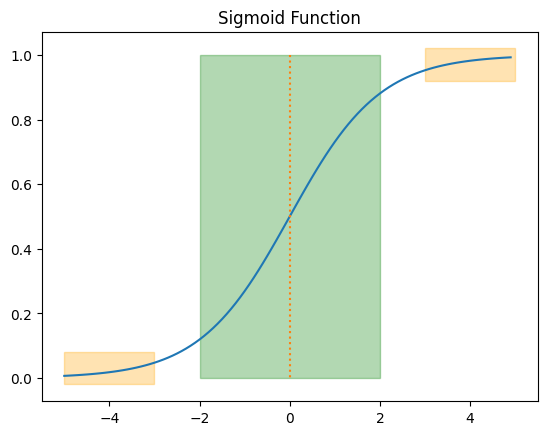

In [27]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')

plt.gca().add_patch(
    patches.Rectangle(
        (-2, 0),
        4, 1,
        color='green',
        fill=True,
        alpha=0.3
    )
)

plt.gca().add_patch(
    patches.Rectangle(
        (3, 0.92),
        2, 0.1,
        color='orange',
        fill=True,
        alpha=0.3
    )
)

plt.gca().add_patch(
    patches.Rectangle(
        (-5, -0.02),
        2, 0.1,
        color='orange',
        fill=True,
        alpha=0.3
    )
)

plt.show()

- 주황색 부분은 기울기를 계산하면 0에 가까운 값이 나오게됨
- 역전파 과정에서 아주 작은 기울기가 곱해지게 되면 앞단에는 기울기가 잘 전달되지 않게 됨 - ***기울기 소실 문제***
- 매개변수 W가 업데이트 되지 않아 학습이 되지 않음

### 3. 하이퍼볼릭탄젠트 합수
- tanh
- 입력값을 -1과 1사이의 값으로 변환

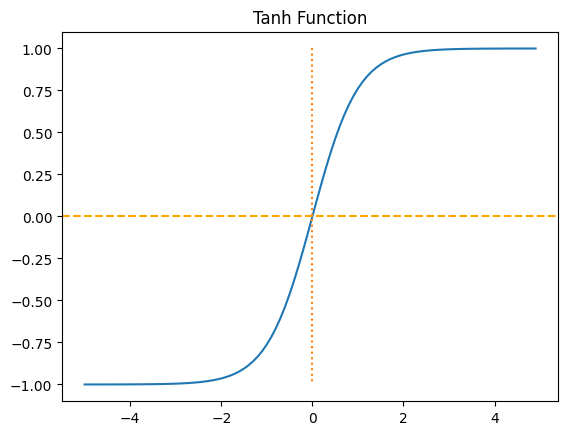

In [28]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

- 하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값에서는 시그모이드 함수와 같은 문제가 발생
- 그렇지만 0을 중심으로 하기에 반환값의 변화폭이 더 큼 - 시그보이드 함수보다는 기울기 소실 증상이 적은 편
- 은닉층에서 많이 사용

### 4. 렐루 함수
- $f(x) = max(0, x)$

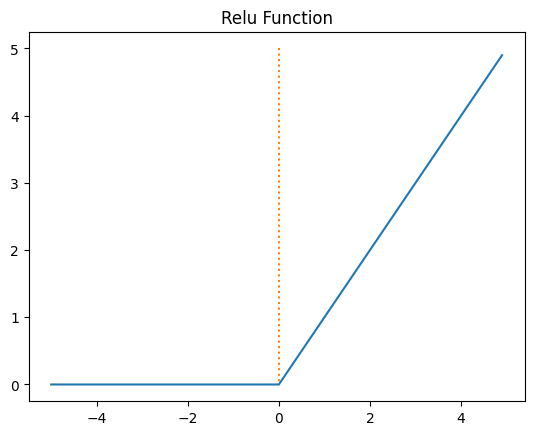

In [29]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

- 가장 흔하게 사용하는 함수
- 깊은 신경망에서 시그모이드보다 더 잘 작동
- 연산 속도도 빠름
- 입력값이 음수면 기울기도 0이 된다는 문제점 - 죽은 렐루

### 5. 리키 렐루
- 렐루의 변형함수
- $f(x) = max(ax,x)$
- a는 하이퍼파라미터로 새는 정도를 결정하고 일반적으로는 0.01의 값을 가짐

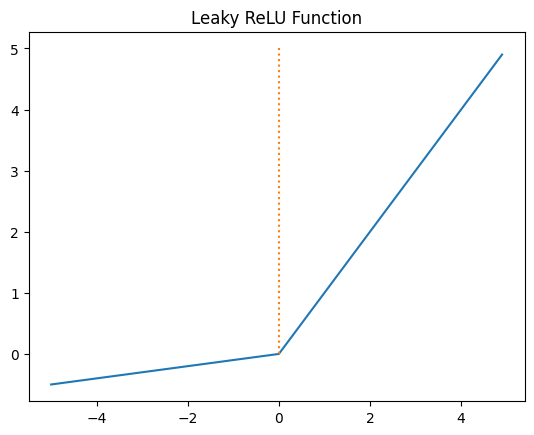

In [31]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

### 6. 소프트맥스 함수
- 분류 문제에서 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용해서 사용
- 시그모이드는 이진분류, 소프트맥스는 다중 클래스 분류 문제에 사용

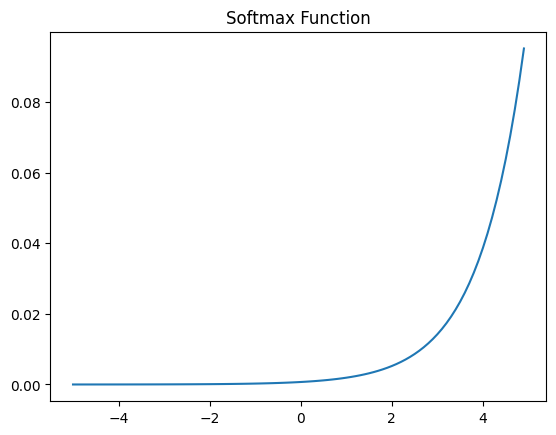

In [32]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

### 7. 출력층의 활성화 함수와 오차 함수의 관계
- 출력층은 어떤 함수를 쓸까?
- 이진 분류 - 시그모이드 - nn.BCELoss()
- 다중 클래스 분류 - 소프트맥스 - nn.CrossEntropyLoss()
- 회귀 - 없음 - MSE

### 그 외
- 시그모이드 함수는 원점 중심이 아님
- 평균이 0아니고 0.5, 항상 양수를 출력 -> 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높음 - 편향이동
- 각 레이어를 지날 따마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 기울기 소실 문제 발생 가능
- 하이퍼볼릭탄젠트 함수는 원점 중심이기에 편향이동은 발생하지 않지만 입력의 절대값이 클 경우 -1이나 1로 수렵하게 되어 기울기 완만해질 수 있음 - 기울기 소실 문제 가능
- ReLU를 먼저 시도해보고 LeakyReLU나 ELU 같은 ReLU의 변형을 시도, sigmoid는 사용 안하는게 좋다다